# **ANALYSE DATASET MVP NBA (1991 -2021)**

**Importation des bibliothèques**

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
#import seaborn as sns
import matplotlib.pyplot as plt

**Lecture des fichiers**

In [5]:

mvps = pd.read_csv("mvps.csv", encoding='latin-1', sep=";")
player_mvp_stats = pd.read_csv("player_mvp_stats.csv", encoding='latin-1', sep=";")
players = pd.read_csv("players.csv", encoding='latin-1', sep=";")
teams = pd.read_csv("teams.csv", encoding='latin-1', sep=";")
nicknames = pd.read_csv("nicknames.csv", encoding='latin-1', sep=";")

**Sélection des Premiers au classement des MVP** 

In [6]:
mvps = mvps[mvps["Rank"] == "1"]
print(mvps)

    Rank                 Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0      1         Michael Jordan   27  CHI     77      891      960  0.928  82   
20     1         Michael Jordan   28  CHI     80      900      960  0.938  80   
37     1        Charles Barkley   29  PHO     59      835      980  0.852  76   
51     1        Hakeem Olajuwon   31  HOU     66      889     1010  0.880  80   
68     1         David Robinson   29  SAS     73      901     1050  0.858  81   
83     1         Michael Jordan   32  CHI    109     1114     1130  0.986  82   
100    1            Karl Malone   33  UTA     63      986     1150  0.857  82   
120    1         Michael Jordan   34  CHI     92     1084     1160  0.934  82   
139    1            Karl Malone   35  UTA     44      827     1180  0.701  49   
160    1       Shaquille O'Neal   27  LAL    120     1207     1210  0.998  79   
176    1          Allen Iverson   25  PHI     93     1121     1240  0.904  71   
193    1             Tim Dun

**Ajouter la colonne Pos(position du joueur) à MVPS'**

In [7]:
for i, player in enumerate(players['Player']):
    players.loc[i, 'Player'] = player.replace('*', '')

# Fusionner les DataFrames en fonction des colonnes 'Player' et 'Year'
mvps_merged = pd.merge(mvps, players[['Player', 'Year', 'Pos']], on=['Player', 'Year'], how='left')
pd.options.display.max_columns = None
print(mvps_merged)

   Rank                 Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0     1         Michael Jordan   27  CHI     77      891      960  0.928  82   
1     1         Michael Jordan   28  CHI     80      900      960  0.938  80   
2     1        Charles Barkley   29  PHO     59      835      980  0.852  76   
3     1        Hakeem Olajuwon   31  HOU     66      889     1010  0.880  80   
4     1         David Robinson   29  SAS     73      901     1050  0.858  81   
5     1         Michael Jordan   32  CHI    109     1114     1130  0.986  82   
6     1            Karl Malone   33  UTA     63      986     1150  0.857  82   
7     1         Michael Jordan   34  CHI     92     1084     1160  0.934  82   
8     1            Karl Malone   35  UTA     44      827     1180  0.701  49   
9     1       Shaquille O'Neal   27  LAL    120     1207     1210  0.998  79   
10    1          Allen Iverson   25  PHI     93     1121     1240  0.904  71   
11    1             Tim Duncan   25  SAS

In [8]:
# Fusionner les DataFrames en fonction des colonnes 'Tm' et 'Abbreviation'
mvps_merged = pd.merge(mvps_merged, nicknames[['Abbreviation','Name']], left_on='Tm', right_on='Abbreviation')
mvps_merged = mvps_merged.drop(columns="Abbreviation")
print(mvps_merged)


   Rank                 Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0     1         Michael Jordan   27  CHI     77      891      960  0.928  82   
1     1         Michael Jordan   28  CHI     80      900      960  0.938  80   
2     1        Charles Barkley   29  PHO     59      835      980  0.852  76   
3     1        Hakeem Olajuwon   31  HOU     66      889     1010  0.880  80   
4     1         David Robinson   29  SAS     73      901     1050  0.858  81   
5     1         Michael Jordan   32  CHI    109     1114     1130  0.986  82   
6     1            Karl Malone   33  UTA     63      986     1150  0.857  82   
7     1         Michael Jordan   34  CHI     92     1084     1160  0.934  82   
8     1            Karl Malone   35  UTA     44      827     1180  0.701  49   
9     1       Shaquille O'Neal   27  LAL    120     1207     1210  0.998  79   
10    1          Allen Iverson   25  PHI     93     1121     1240  0.904  71   
11    1             Tim Duncan   25  SAS

In [9]:
# Suppression des " * " dnas le jeu des données

teams["Team"] = teams["Team"].str.replace("*", "")

**Affichage des doublons**

In [10]:
# Grouper les données par an et equipe
grouped_by_year_team = teams.groupby(["Year", "Team"])

# Itérrer pour vérifier les doublons
doublon = []
for (year, team), group in grouped_by_year_team:
    #print(year, team)
    if len(group) > 1:
        doublon.append(group)
        print(f"In {year}, the team {team} appears multiple times.")
        print(group)
        print()
print(doublon)

[]


**Fusion des colonnes d'autres fichiers**

In [11]:
# Colonnes à fusionner
columns_to_merge = ["W", "L", "W/L%", "GB", "PS/G", "PA/G", "SRS", "Year", "Team"]

# Fusionner les DataFrames en utilisant les clés "Year" et "Name" afin d'avoir les stats de l'équipe du joueur MVP à son année afin de comparer
mvps_players_merged = pd.merge(mvps_merged, teams[columns_to_merge], left_on=["Year", "Name"], right_on=["Year", "Team"])

mvps_players_merged

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,Pos,Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Team
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991,SG,Chicago Bulls,61,21,0.744,,110,101,8.57,Chicago Bulls
1,1,Michael Jordan,28,CHI,80,900,960,0.938,80,38.8,30.1,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992,SG,Chicago Bulls,67,15,0.817,,109.9,99.5,10.07,Chicago Bulls
2,1,Charles Barkley,29,PHO,59,835,980,0.852,76,37.6,25.6,12.2,5.1,1.6,1.0,0.520,0.305,0.765,14.4,0.242,1993,PF,Phoenix Suns,62,20,0.756,,113.4,106.7,6.27,Phoenix Suns
3,1,Hakeem Olajuwon,31,HOU,66,889,1010,0.880,80,41.0,27.3,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994,C,Houston Rockets,58,24,0.707,,101.1,96.8,4.19,Houston Rockets
4,1,David Robinson,29,SAS,73,901,1050,0.858,81,38.0,27.6,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995,C,San Antonio Spurs,62,20,0.756,,106.6,100.6,5.9,San Antonio Spurs
5,1,Michael Jordan,32,CHI,109,1114,1130,0.986,82,37.7,30.4,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317,1996,SG,Chicago Bulls,72,10,0.878,,105.2,92.9,11.8,Chicago Bulls
6,1,Karl Malone,33,UTA,63,986,1150,0.857,82,36.6,27.4,9.9,4.5,1.4,0.6,0.550,0.000,0.755,16.7,0.268,1997,PF,Utah Jazz,64,18,0.78,,103.1,94.3,7.97,Utah Jazz
7,1,Michael Jordan,34,CHI,92,1084,1160,0.934,82,38.8,28.7,5.8,3.5,1.7,0.5,0.465,0.238,0.784,15.8,0.238,1998,SG,Chicago Bulls,62,20,0.756,,96.7,89.6,7.24,Chicago Bulls
8,1,Karl Malone,35,UTA,44,827,1180,0.701,49,37.4,23.8,9.4,4.1,1.3,0.6,0.493,0.000,0.788,9.6,0.252,1999,PF,Utah Jazz,37,13,0.74,,93.3,86.8,5.54,Utah Jazz
9,1,Shaquille O'Neal,27,LAL,120,1207,1210,0.998,79,40.0,29.7,13.6,3.8,0.5,3.0,0.574,0.000,0.524,18.6,0.283,2000,C,Los Angeles Lakers,67,15,0.817,,100.8,92.3,8.41,Los Angeles Lakers


In [12]:
mvps_merged = mvps_players_merged
# Créer une liste des noms de colonnes existants à renommer
columns_to_rename = ["W", "L", "W/L%", "GB", "PS/G", "PA/G", "SRS"]

# Parcourir la liste des noms de colonnes à renommer et renommer chaque colonne en ajoutant le suffixe "- team"
for column_name in columns_to_rename:
    mvps_merged = mvps_merged.rename(columns={column_name: "Tms -" + column_name })

**Conversion en Float**

In [13]:
# Liste des colonnes à convertir en float
columns_to_convert = ["Tms -W", "Tms -L", "Tms -W/L%", "Tms -GB", "Tms -PS/G", "Tms -PA/G", "Tms -SRS"]

# Convertir les colonnes en float
mvps_merged[columns_to_convert] = mvps_merged[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Vérifier le type de données après conversion
print(mvps_merged.dtypes)

Rank          object
Player        object
Age            int64
Tm            object
First          int64
Pts Won        int64
Pts Max        int64
Share        float64
G              int64
MP           float64
PTS          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
FG%          float64
3P%          float64
FT%          float64
WS           float64
WS/48        float64
Year           int64
Pos           object
Name          object
Tms -W         int64
Tms -L         int64
Tms -W/L%    float64
Tms -GB      float64
Tms -PS/G    float64
Tms -PA/G    float64
Tms -SRS     float64
Team          object
dtype: object


In [14]:
# Sélectionner uniquement les colonnes numériques dans le DataFrame
numeric_columns = mvps_merged.select_dtypes(include=["number"])

print(mvps_merged.dtypes)

# Calculer la corrélation entre les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Filtrer la matrice de corrélation pour n'avoir que les valeurs entre 0,40 et 1
filtered_matrix = correlation_matrix.mask((correlation_matrix < 0.4) & (correlation_matrix > -0.4))

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

Rank          object
Player        object
Age            int64
Tm            object
First          int64
Pts Won        int64
Pts Max        int64
Share        float64
G              int64
MP           float64
PTS          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
FG%          float64
3P%          float64
FT%          float64
WS           float64
WS/48        float64
Year           int64
Pos           object
Name          object
Tms -W         int64
Tms -L         int64
Tms -W/L%    float64
Tms -GB      float64
Tms -PS/G    float64
Tms -PA/G    float64
Tms -SRS     float64
Team          object
dtype: object


NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
print(mvps_merged)

   Rank                 Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0     1         Michael Jordan   27  CHI     77      891      960  0.928  82   
1     1         Michael Jordan   28  CHI     80      900      960  0.938  80   
2     1        Charles Barkley   29  PHO     59      835      980  0.852  76   
3     1        Hakeem Olajuwon   31  HOU     66      889     1010  0.880  80   
4     1         David Robinson   29  SAS     73      901     1050  0.858  81   
5     1         Michael Jordan   32  CHI    109     1114     1130  0.986  82   
6     1            Karl Malone   33  UTA     63      986     1150  0.857  82   
7     1         Michael Jordan   34  CHI     92     1084     1160  0.934  82   
8     1            Karl Malone   35  UTA     44      827     1180  0.701  49   
9     1       Shaquille O'Neal   27  LAL    120     1207     1210  0.998  79   
10    1          Allen Iverson   25  PHI     93     1121     1240  0.904  71   
11    1             Tim Duncan   25  SAS

   Rank  Player  Age  First  Pts Won  Pts Max  Share   G    MP   PTS   TRB  \
0     1       0   27     77      891      960  0.928  82  37.0  31.5   6.0   
1     1       0   28     80      900      960  0.938  80  38.8  30.1   6.4   
2     1       1   29     59      835      980  0.852  76  37.6  25.6  12.2   
3     1       2   31     66      889     1010  0.880  80  41.0  27.3  11.9   
4     1       3   29     73      901     1050  0.858  81  38.0  27.6  10.8   
5     1       0   32    109     1114     1130  0.986  82  37.7  30.4   6.6   
6     1       4   33     63      986     1150  0.857  82  36.6  27.4   9.9   
7     1       0   34     92     1084     1160  0.934  82  38.8  28.7   5.8   
8     1       4   35     44      827     1180  0.701  49  37.4  23.8   9.4   
9     1       5   27    120     1207     1210  0.998  79  40.0  29.7  13.6   
10    1       6   25     93     1121     1240  0.904  71  42.0  31.1   3.8   
11    1       7   25     57      954     1260  0.757  82  40.6  

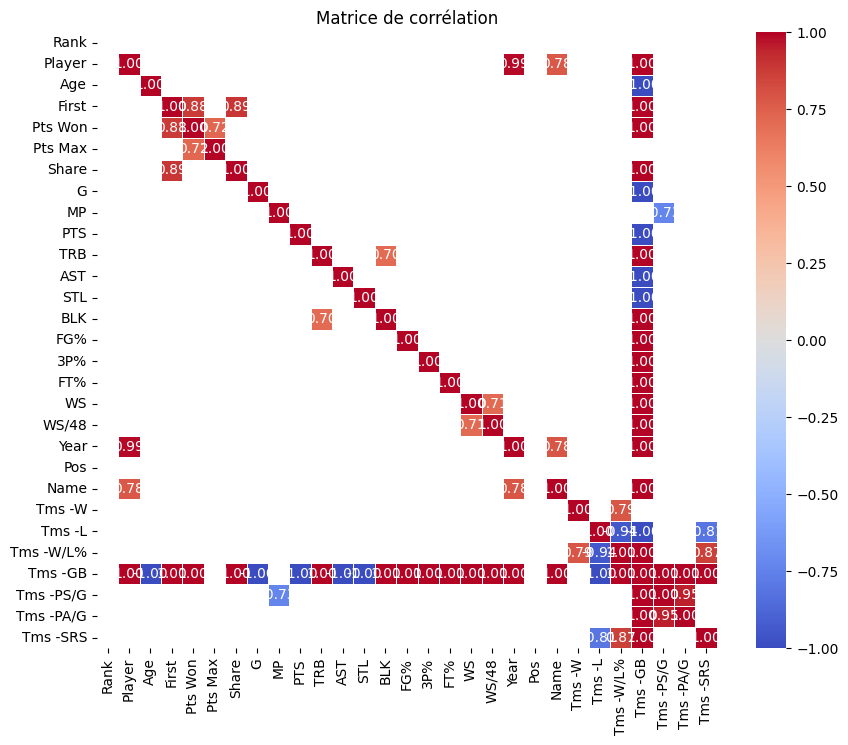

In [ ]:
mvps_merged_explo = mvps_merged.copy()
mvps_merged_explo = mvps_merged_explo.drop(columns="Tm")
mvps_merged_explo = mvps_merged_explo.drop(columns="Team")
# Créer des dictionnaires pour mapper les joueurs et les équipes à des valeurs numériques uniques
player_mapping = {player: i for i, player in enumerate(mvps_merged_explo['Player'].unique())}
team_mapping = {team: i for i, team in enumerate(mvps_merged_explo['Name'].unique())}
post_mapping = {post: i for i, post in enumerate(mvps_merged_explo['Pos'].unique())}

# Remplacer les noms de joueurs et d'équipes par les valeurs numériques correspondantes
mvps_merged_explo['Player'] = mvps_merged_explo['Player'].map(player_mapping)
mvps_merged_explo['Name'] = mvps_merged_explo['Name'].map(team_mapping)
mvps_merged_explo['Pos'] = mvps_merged_explo['Pos'].map(team_mapping)

print(mvps_merged_explo)

# Calculer la corrélation entre les colonnes numériques de votre DataFrame
correlation_matrix = mvps_merged_explo.corr()

# Filtrer la matrice de corrélation pour n'avoir que les valeurs entre 0,40 et 1
filtered_matrix = correlation_matrix.mask((correlation_matrix < 0.7) & (correlation_matrix > -0.7))

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

On peut remarquer que la colonne  PS/G est fortement décorélé avec la colonne MP qui sont les minutes joué du joueur MVP
On peut également remarquer que PS/G est corrélé avec  la colonne PA/G qui nous dit que le nombre de point sd'un équiepe va plutot varier en fonction des opposants qu'elle a en face 

In [ ]:
pd.options.display.max_columns = None
print(mvps_players_merged)

   Rank                 Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0     1         Michael Jordan   27  CHI     77      891      960  0.928  82   
1     1         Michael Jordan   28  CHI     80      900      960  0.938  80   
2     1        Charles Barkley   29  PHO     59      835      980  0.852  76   
3     1        Hakeem Olajuwon   31  HOU     66      889     1010  0.880  80   
4     1         David Robinson   29  SAS     73      901     1050  0.858  81   
5     1         Michael Jordan   32  CHI    109     1114     1130  0.986  82   
6     1            Karl Malone   33  UTA     63      986     1150  0.857  82   
7     1         Michael Jordan   34  CHI     92     1084     1160  0.934  82   
8     1            Karl Malone   35  UTA     44      827     1180  0.701  49   
9     1       Shaquille O'Neal   27  LAL    120     1207     1210  0.998  79   
10    1          Allen Iverson   25  PHI     93     1121     1240  0.904  71   
11    1             Tim Duncan   25  SAS

In [ ]:
# Prise en compte des lignes du tableau sans celles contenant la valeur "Rk" 

print(players.loc[players["Rk"] == "Rk"])
players["MP"] = pd.to_numeric(players["MP"], errors='coerce')

       Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P  \
47     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
70     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
93     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
118    Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
145    Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
...    ..     ...  ...  ...  .. ..  ..  ..  ..  ...  ...  ..  ...  ...  ..   
17908  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
17931  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
17960  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
17989  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   
18017  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  FG%  3P  3PA  3P%  2P   

       2PA  2P%  eFG%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  B

# **ILLUSTRATION**

In [ ]:
# Représentation du nombre des fois où les joueurs ont été MVP en fonction de leurs postes de jeu. vps
position_counts = mvps_merged['Pos'].value_counts().reset_index()
position_counts

# Remplacement des abréviations
alias = { 'PG':'Meneur de jeu','SG':'Arrière', 'SF':'Ailier','PF':'Ailier Fort','C':'Pivot'}

# Conversion les abréviations en noms complets dans le dataframe
position_counts['Pos'] = [alias.get(item, item) for item in position_counts['Pos']]

# Création du graphique
fig = px.bar(position_counts, x='Pos', y='count',color="Pos",              title="Nombre de fois où chaque poste a été numéro 1 au classement MVP",
             labels={'Pos': 'Position', 'count': 'Nombre de fois','PG':'Meneur de jeu'})

# Affichage du graphique
fig.show()

In [ ]:
fig = px.scatter(mvps_merged, x="Year", y="PTS", title="Nombre des points marqués par les MVP au fil des années", color="Player",labels={'PTS': 'Moyenne des points par matchs', 'Year': "Années"},trendline="ols",trendline_scope="overall")

top_scorer = mvps_merged.loc[mvps_merged["PTS"].idxmax()]

fig.add_annotation(
    x=top_scorer["Year"],
    y=top_scorer["PTS"],
    text=top_scorer["Player"],
    showarrow=True,
    arrowhead=2,
    ax=20,  # Position horizontale du texte par rapport à la flèche
    ay=-30  # Position verticale du texte par rapport à la flèche
)

fig.show()

Le nombre de points marqués par les MVP au fil des années sont en contates croissance

In [ ]:
fig = px.scatter(mvps_merged, x="Age", y="PTS", title="Nombre des points marqués en fonction de l'age", color="Player",labels={'PTS': 'Moyenne des points par matchs', 'Year': "Années"},trendline="ols",trendline_scope="overall")

top_scorer = mvps_merged.loc[mvps_merged["PTS"].idxmax()]

fig.add_annotation(
    x=top_scorer["Age"],
    y=top_scorer["PTS"],
    text=top_scorer["Player"],
    showarrow=True,
    arrowhead=2,
    ax=20,  # Position horizontale du texte par rapport à la flèche
    ay=-30  # Position verticale du texte par rapport à la flèche
)

fig.show()

Ce qu'on peut remarquer c'est que les joueurs qui ont marqué le plus de points sont ceux qui sont les plus jeunes et ceux qui ont marqué le moins de points sont ceux qui sont les plus vieux.

In [ ]:
# age_moy_mvp = mvps["Age"].mean()
# moy=round(age_moy_mvp,1)
# print("L'age moyen est ",moy)

# age_moy_lot = mvps['Rank']
# print("Le rang moyen est ",age_moy_lot)

rang = mvps["Rank"]
rang 


0      1
20     1
37     1
51     1
68     1
83     1
100    1
120    1
139    1
160    1
176    1
193    1
211    1
224    1
240    1
256    1
267    1
284    1
301    1
313    1
328    1
341    1
356    1
372    1
389    1
401    1
411    1
422    1
435    1
447    1
459    1
Name: Rank, dtype: object

In [ ]:

fig = px.scatter(mvps_merged,x="Year",y="Age",title="Moyenne d'âge des MVP au fil des ans",color="Player",labels={'Age': 'Âge', 'Year': 'Années'},
    trendline="ols",trendline_scope="overall")

# Localiser le joueur le plus jeune
youngest_player = mvps_merged.loc[mvps_merged["Age"].idxmin()]
# Ajouter une annotation pour le joueur le plus jeune
fig.add_annotation(
    x=youngest_player["Year"],y=youngest_player["Age"], text=f"{youngest_player['Player']} (Âge: {youngest_player['Age']})", showarrow=True,
    arrowhead=2,ax=20,ay=-30)

# Localiser le joueur le plus vieux
oldest_player = mvps_merged.loc[mvps_merged["Age"].idxmax()]
# Ajouter une annotation pour le joueur le plus vieux
fig.add_annotation(
    x=oldest_player["Year"],y=oldest_player["Age"], text=f"{oldest_player['Player']} (Âge: {oldest_player['Age']})", showarrow=True,
    arrowhead=2,ax=20,ay=-30)


# Affichage le graphique
fig.show()

**Nous constatons que l'age, et la moyenne des points marq ainsi que l'appport du joueur dans son équipe entre en considération dans l'élection pour le titre de MVP de l'année**u